## Put our data on map!
Good news about my data is that it comes with shp file. Let's see what it gives to us!
Key point: 
- Looks like a lot of accidents are on principal arterial

In [2]:
import pdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [15]:
clo_shp = gpd.read_file("/Users/ou/Projects/data-incubator/Collisions.shp")
str_shp = gpd.read_file("/Users/ou/Projects/data-incubator/Seattle_Streets.shp")

In [47]:
# STREETTYPE, ARTDESCRIP give me clues about the types of the streets
str_shp.head(2)

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,...,STREETTYPE,PVMTCONDIN,PVMTCOND_1,TRANCLASS,TRANDESCRI,SLOPE_PCT,PVMTCATEGO,PARKBOULEV,SHAPE_Leng,geometry
0,1,2.0,1006,00010,0120,000100120,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,1ST AVE,SENECA ST,UNIVERSITY ST,...,Downtown Neighborhood,87.0,62.0,1,PRINCIPAL TRANSIT ROUTE,4.0,ART,N,305.966050,"LINESTRING (-122.33754 47.60612, -122.33820 47..."
1,2,2.0,1009,00010,0150,000100150,1ST AVE BETWEEN PIKE ST AND PINE ST,1ST AVE,PIKE ST,PINE ST,...,Downtown Neighborhood,57.0,58.0,1,PRINCIPAL TRANSIT ROUTE,5.0,ART,N,426.031562,"LINESTRING (-122.34001 47.60882, -122.34092 47..."


In [48]:
# I am curious to see Principal Arterial vs. Minor Arterial 
str_shp['ARTDESCRIP'].value_counts()

Not Designated         16961
Minor Arterial          2460
Principal Arterial      2197
Collector Arterial      1882
Interstate/Freeway       263
State Route/Freeway       36
County Arterial            1
Name: ARTDESCRIP, dtype: int64

In [50]:
# Curious to compare downtown to others
str_shp['STREETTYPE'].value_counts()

Neighborhood Yield Street            12799
Urban Village Neighborhood Access     3074
Neighborhood Corridor                 2193
Urban Center Connector                1186
Urban Village Neighborhood            1144
Urban Village Main                     811
Minor Industrial Access                594
Industrial Access                      460
Downtown                               298
Downtown Neighborhood                  227
Downtown Neighborhood Access           197
Alley                                   30
Name: STREETTYPE, dtype: int64

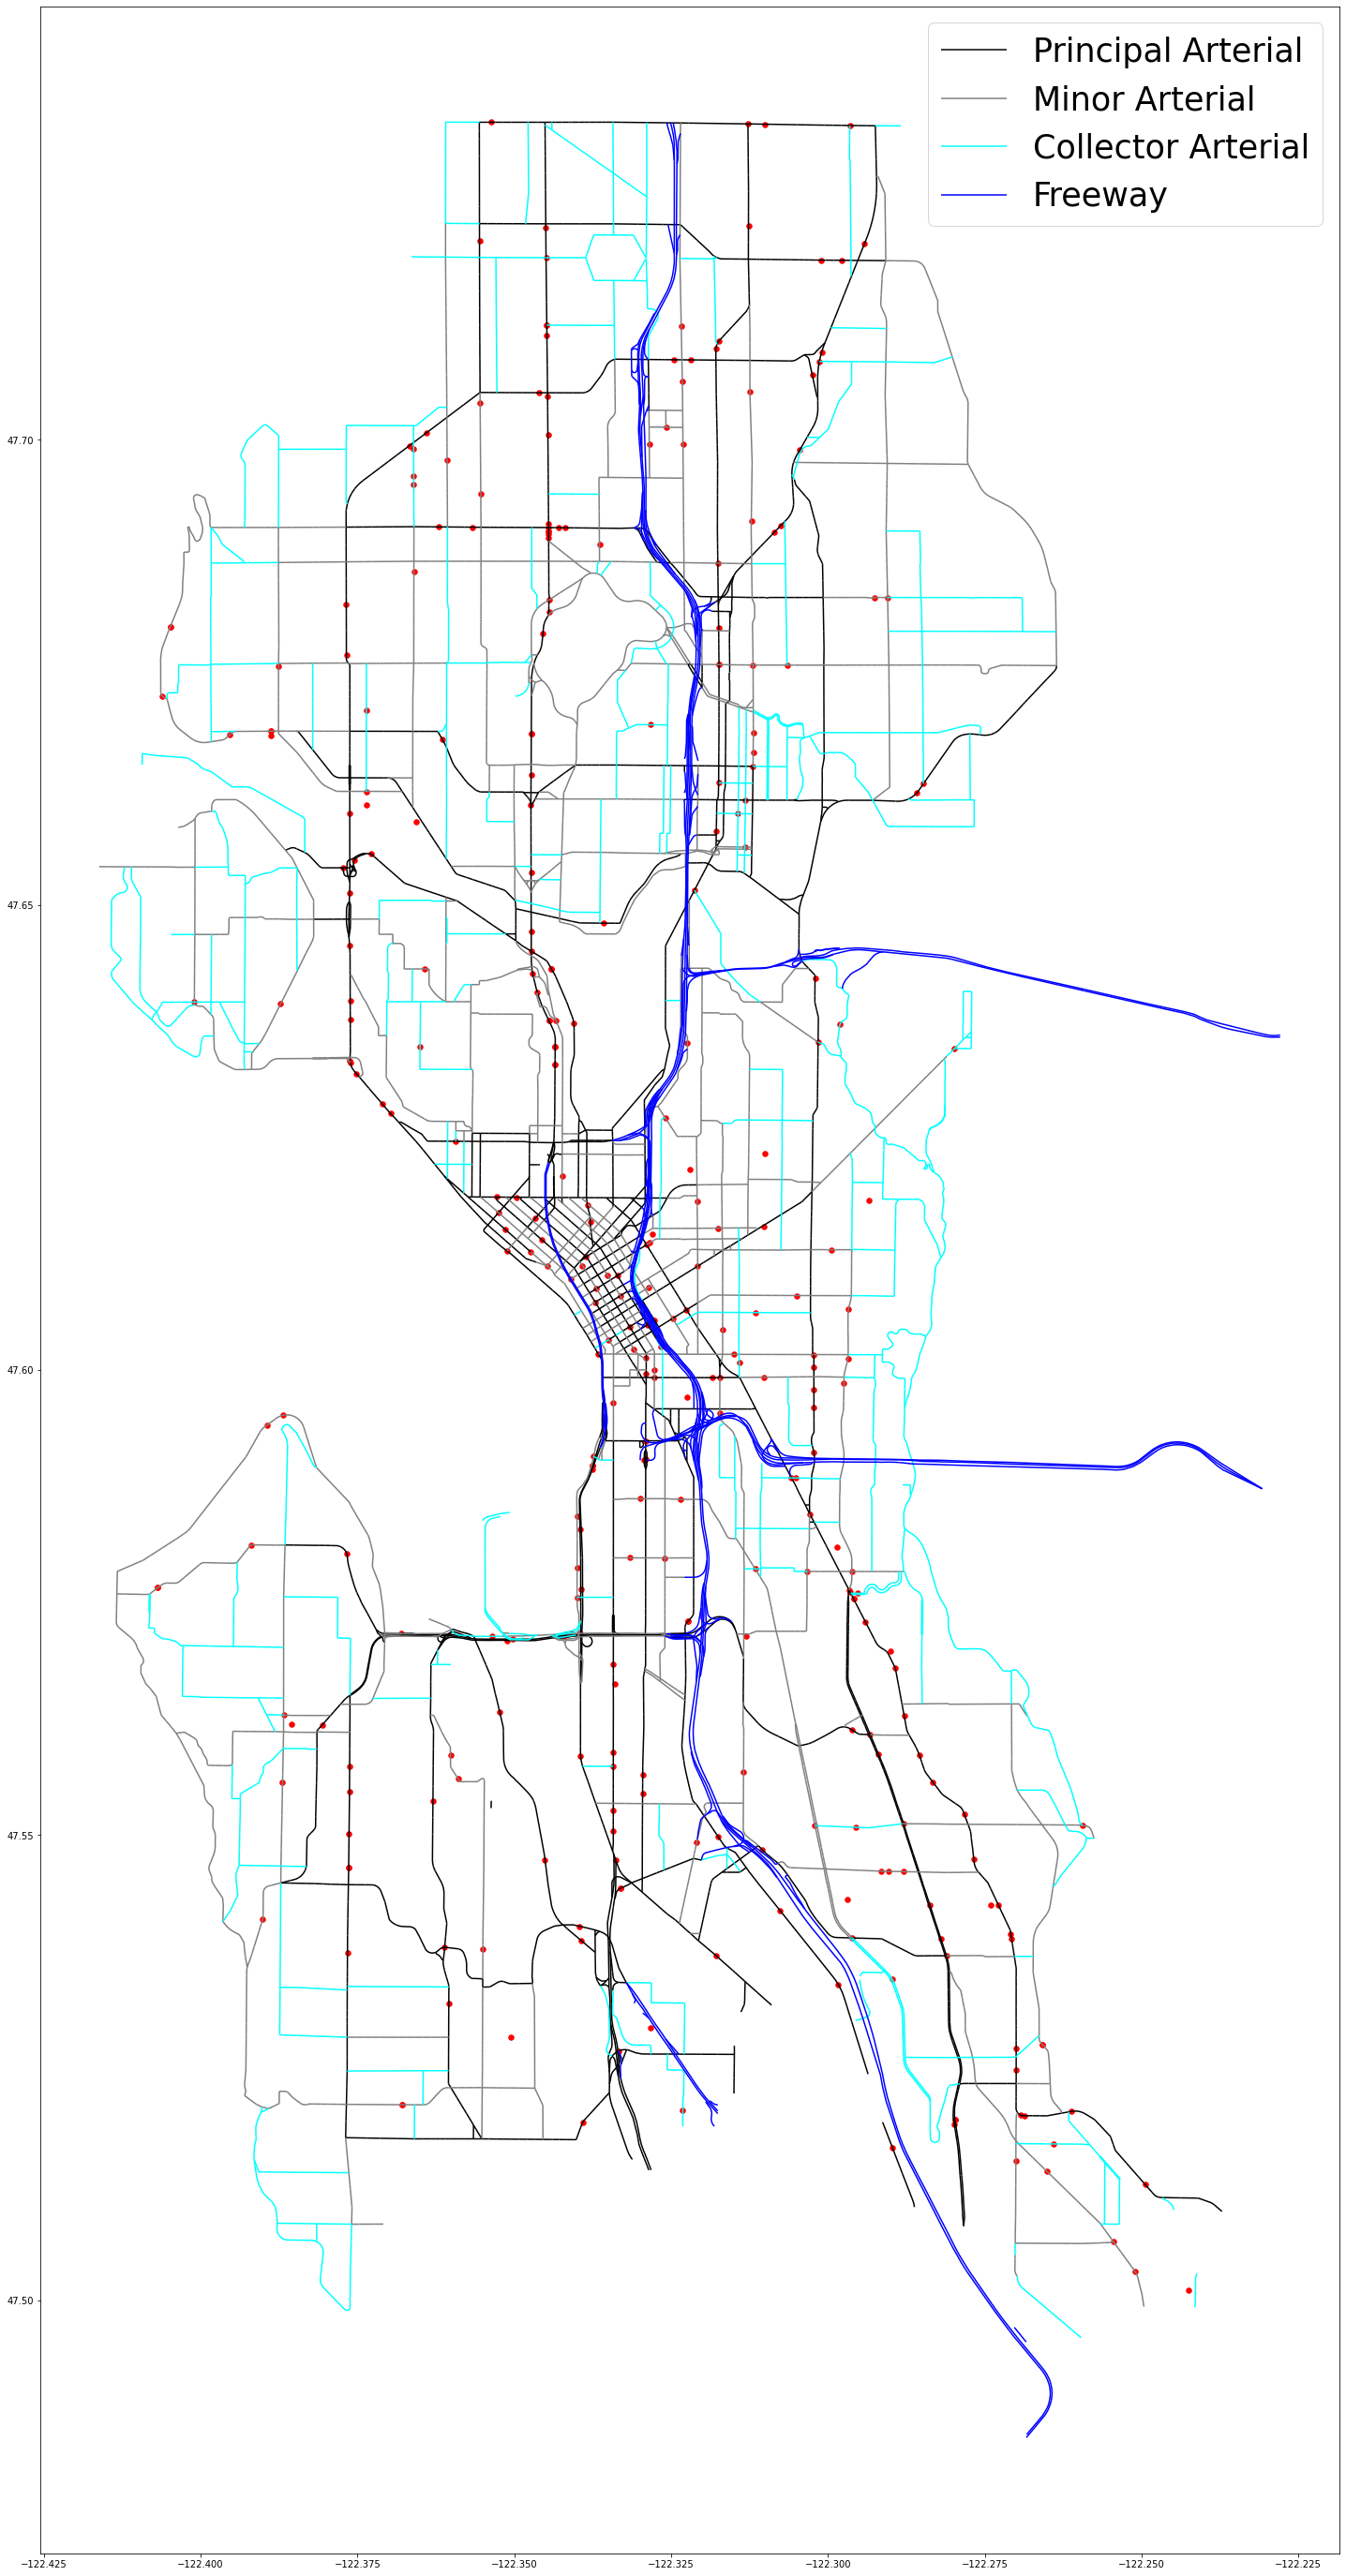

In [49]:
# Graph accidents on the streets: looks like a lot of accidents are on principal arterial
fig, ax = plt.subplots(figsize = (50,50))
str_shp[str_shp['ARTDESCRIP']=='Principal Arterial'].plot(ax=ax, color="black", label="Principal Arterial")
str_shp[str_shp['ARTDESCRIP']=='Minor Arterial'].plot(ax=ax, color="grey", label="Minor Arterial")
str_shp[str_shp['ARTDESCRIP']=='Collector Arterial'].plot(ax=ax, color="cyan", label="Collector Arterial")
str_shp[str_shp['ARTDESCRIP'].isin(['Interstate/Freeway', 'State Route/Freeway'])].plot(ax=ax, color="blue", label="Freeway")
clo_shp[clo_shp['SEVERITYCO']=='3'].plot(ax = ax, markersize = 30, color="red", marker="o")
plt.legend(prop={'size':35})
plt.show()

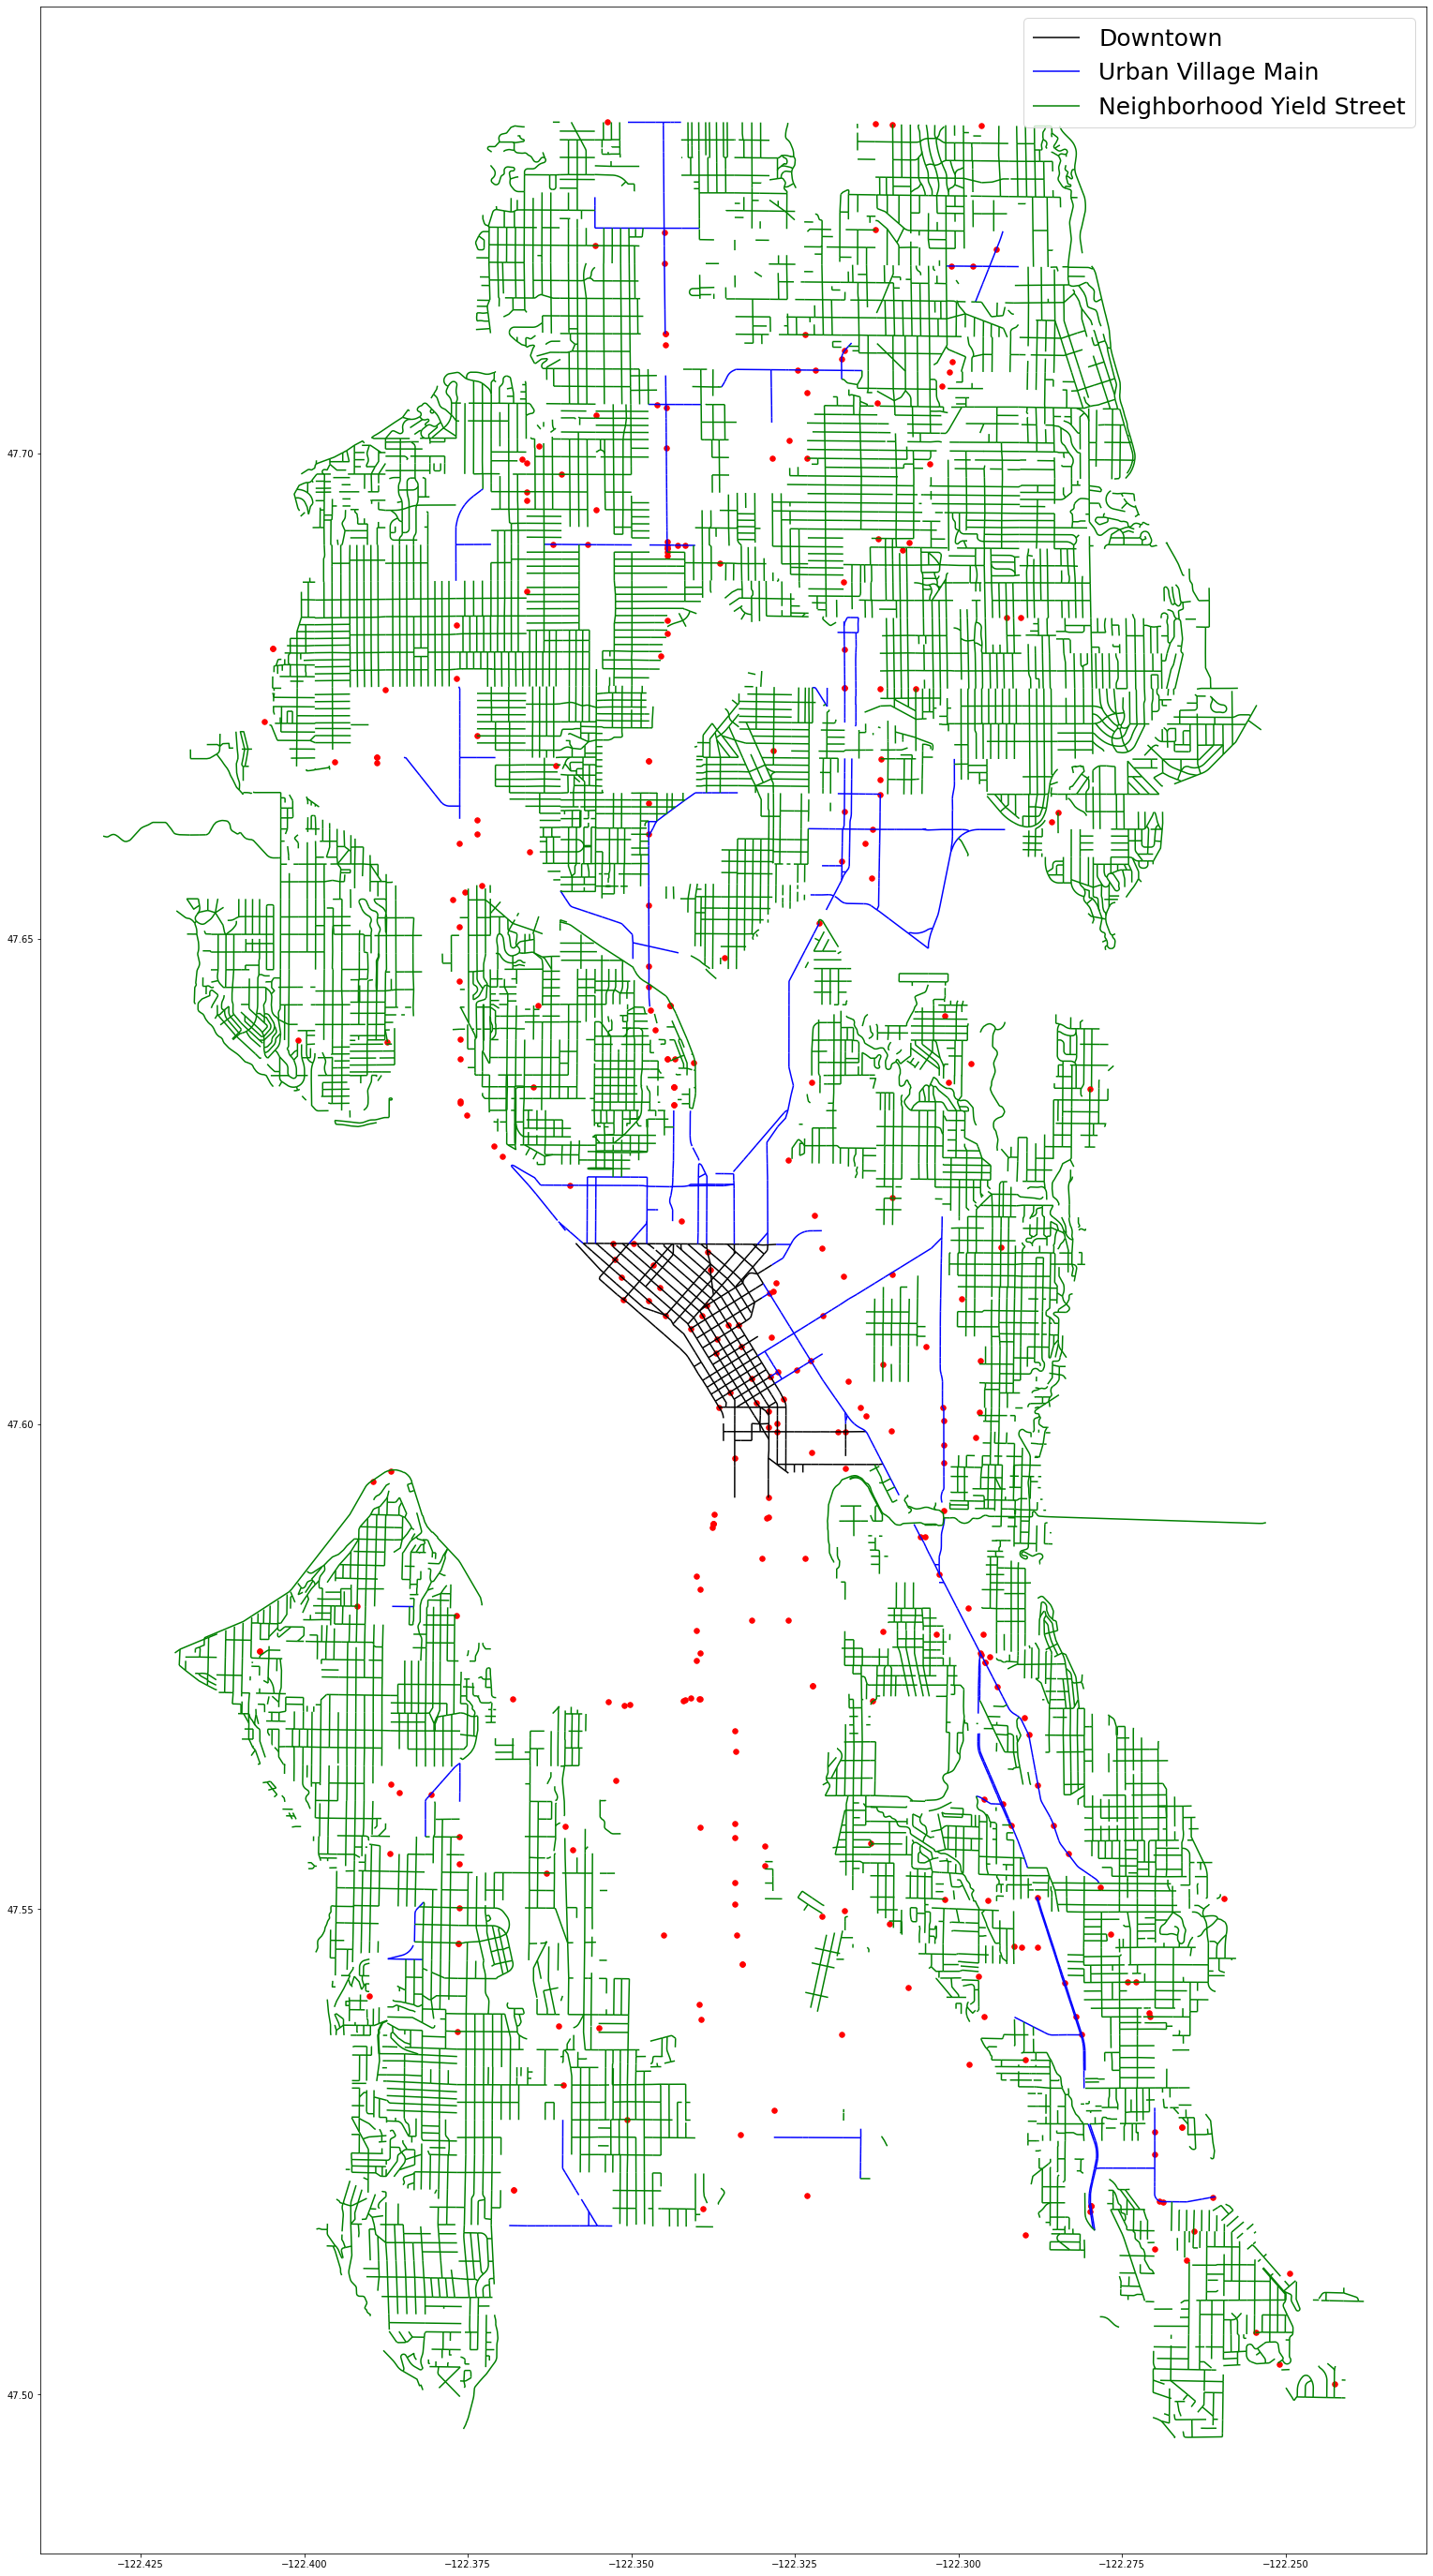

In [54]:
# Seems like accidents are everywhere
fig, ax2 = plt.subplots(figsize = (50,50))
str_shp[str_shp['STREETTYPE'].isin(['Downtown', 'Downtown Neighborhood'])].plot(ax=ax2, color="black", label="Downtown")
str_shp[str_shp['STREETTYPE']=='Urban Village Main'].plot(ax=ax2, color="blue", label="Urban Village Main")
str_shp[str_shp['STREETTYPE']=='Neighborhood Yield Street'].plot(ax=ax2, color="green", label="Neighborhood Yield Street")
clo_shp[clo_shp['SEVERITYCO']=='3'].plot(ax = ax2, markersize = 30, color="red", marker="o")
plt.legend(prop={'size':25})
plt.show()